# Dataset

* `description.csv` - A description of the diaseses
* `diets.csv` - A recommendation of diets for each disease
* `medications.csv` - A medications for each disease
* `precautions_df.csv` - A precautions for each disease
* `Symptom-severity.csv` - A serverity for each disease
* `symptoms.csv` - A symptoms for each disease
* `Training.csv` - A training set for each disease
* `workout_df.csv` - A workouts for each disease

## Project Plan

### Data Processing & Model Building (TensorFlow)
- Read and clean the dataset
- Create a deep learning model using TensorFlow to predict diseases based on symptoms
- Train the model with data from 
Training.csv

- Evaluate and save the model

### Streamlit app
- Create a user interface that allows users to select symptoms
- Use models to predict diseases
- Show drug recommendations from `medications.csv`
- Show diet recommendations from `diets.csv`
- Show precautions from `precautions_df.csv`
- Show physical activity recommendations from `workout_df.csv`

### Additional Features
- Disease description from description.csv
- Symptom-based severity from Symptom-severity.csv
- Data visualization

# Data Processing & TensorFlow Model Building

In [66]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os 

os.environ['KERAS_BACKEND'] = 'tensorflow'

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
# Load dataset
training_data = pd.read_csv('../data/Training.csv')
symptom_severity = pd.read_csv('../data/Symptom-severity.csv')
medications = pd.read_csv('../data/medications.csv')
diets = pd.read_csv('../data/diets.csv')
precautions = pd.read_csv('../data/precautions_df.csv')
descriptions = pd.read_csv('../data/description.csv')
workouts = pd.read_csv('../data/workout_df.csv')

In [68]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [69]:
# Show information of datasets
print('Training data shape:', training_data.shape)
print('\nTraining data sample:')
training_data.head()

Training data shape: (4920, 133)

Training data sample:


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [70]:
# check missing values
print('\nMissing values in training data:')
training_data.isnull().sum()


Missing values in training data:


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

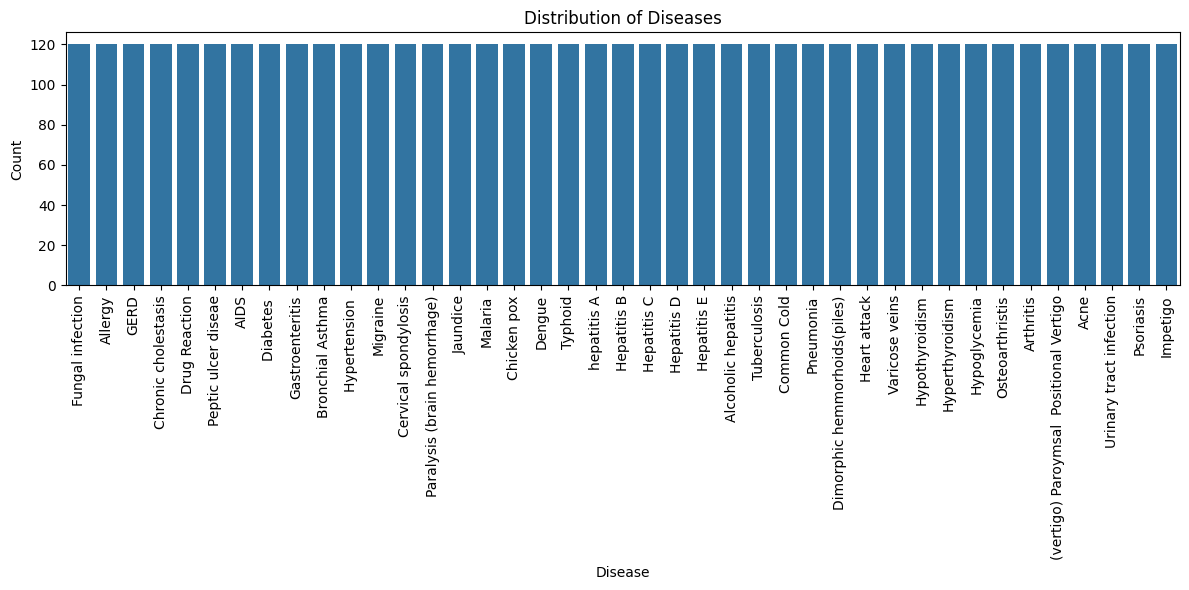

In [71]:
# Analyze the distribution of disease
plt.figure(figsize=(12, 6))
disease_counts = training_data['prognosis'].value_counts()
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

After the above code, we will proceed with data processing and model building:

In [72]:
# Preprocessing data
# Extract features from the dataset
X = training_data.drop('prognosis', axis=1)
y = training_data['prognosis']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode target for model training
# Using sparse_output=False instead of sparse=False for newer scikit-learn versions
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1,1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# model training
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_onehot.shape[1], activation='softmax')
])


# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary model
model.summary()

c:\Users\Aldi\anaconda3\envs\tf2\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 41)             │         2,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,945 (109.16 KB)

 Trainable params: 27,945 (109.16 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Train model
history = model.fit(
    X_train, 
    y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2877 - loss: 3.2948 - val_accuracy: 0.9962 - val_loss: 0.9673
Epoch 2/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9583 - loss: 0.7279 - val_accuracy: 1.0000 - val_loss: 0.0611
Epoch 3/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.1348 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 4/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0571 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 5/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0162 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/500
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 1.0000 - v

In [74]:
# Evaluate model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Convert labels to strings
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test_labels)

# Print classification report
print("\nAccuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_labels))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Accuracy: 1.0

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Co

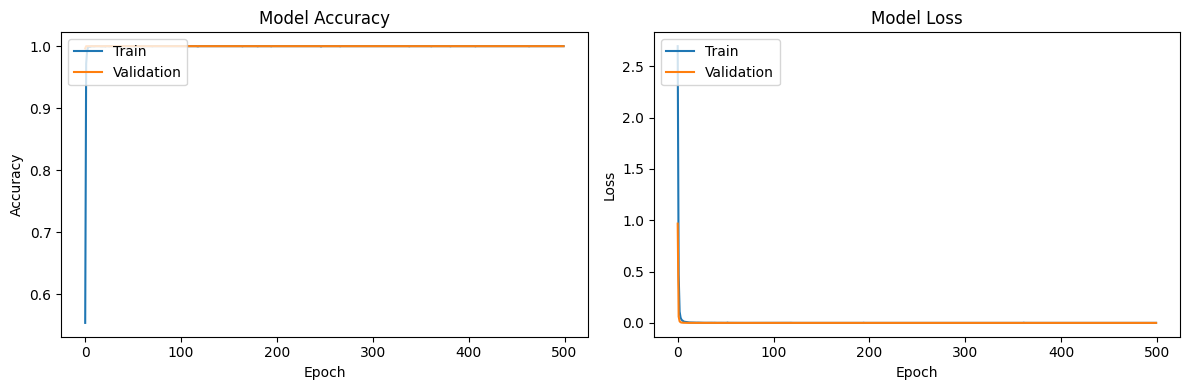

In [75]:
# Plot history training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Save the model

In [76]:
model.save('../models/disease_prediction_model.h5')
print('Model saved successfully!')

Model saved successfully!


In [77]:
# Save the label encoder to use later
import pickle
with open('../models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print('Label encoder saved successfully!')

Label encoder saved successfully!


## Testing model

In [78]:
# Make function to predict disease
def predict_disease(symptoms):
    # make empty array
    input_data = np.zeros(len(X.columns))

    # Set 1 for the symptoms that are present
    for symptom in symptoms:
        if symptom in X.columns:
            input_data[X.columns.get_loc(symptom)] = 1

    # Reshape data for prediction
    input_data = input_data.reshape(1, -1)

    # Make predictions
    prediction = model.predict(input_data)
    disease_index = np.argmax(prediction, axis=1)[0]
    disease = label_encoder.inverse_transform([disease_index])[0]

    return disease, prediction[0][disease_index]

In [79]:
test_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions']
predicted_disease, confidence = predict_disease(test_symptoms)
print(f"Predicted Disease: {predicted_disease}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Disease: Fungal infection
Confidence: 1.00


In [85]:
def get_recommendations(disease):

    meds = medications[medications['Disease'] == disease]
    
    diet = diets[diets['Disease'] == disease]
    
    precaution = precautions[precautions['Disease'] == disease]

    description = descriptions[descriptions['Disease'] == disease]
    
    workout = workouts[workouts['disease'] == disease]

    # Perbaikan untuk medications
    med_list = []
    if not meds.empty:
        med_str = meds.iloc[0, 1]
        if isinstance(med_str, str):
            # Hapus karakter ['...'] dan pisahkan berdasarkan koma
            med_str = med_str.strip('[]\'\"')
            # Pisahkan string dan bersihkan setiap item
            med_items = [item.strip().strip('\'\"') for item in med_str.split(',')]
            med_list = [item for item in med_items if item]
    
    # Perbaikan untuk diet
    diet_list = []
    if not diet.empty:
        diet_str = diet.iloc[0, 1]
        if isinstance(diet_str, str):
            # Hapus karakter ['...'] dan pisahkan berdasarkan koma
            diet_str = diet_str.strip('[]\'\"')
            # Pisahkan string dan bersihkan setiap item
            diet_items = [item.strip().strip('\'\"') for item in diet_str.split(',')]
            diet_list = [item for item in diet_items if item]
    
    return {
        'medications': med_list,
        'diet': diet_list,
        'precautions': precaution.iloc[0, 1:].dropna().tolist() if not precaution.empty else [],
        'description': description.iloc[0, 1] if not description.empty else "No description available",
        'workout': workout.iloc[0, 1:].dropna().tolist()[-1] if not workout.empty else []
    }

In [86]:
recommendations = get_recommendations(predicted_disease)
print('\nRecommendations for', predicted_disease)
print('Medications:', recommendations['medications'])
print('Diet:', recommendations['diet'])
print('Precautions:', recommendations['precautions'])
print('Description:', recommendations['description'])
print('Workout:', recommendations['workout'])


Recommendations for Fungal infection
Medications: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
Diet: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
Precautions: ['Fungal infection', 'bath twice', 'use detol or neem in bathing water', 'keep infected area dry', 'use clean cloths']
Description: Fungal infection is a common skin condition caused by fungi.
Workout: Avoid sugary foods


In [82]:
test_symptoms2 = ['muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness']
predicted, confidence = predict_disease(test_symptoms2)
print(f'Predicted Disease: {predicted}')
print(f'Confidence: {confidence:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Disease: Arthritis
Confidence: 1.00
